### Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

### Data Pre-Processing

In [ ]:
# Load dataset
df = pd.read_csv('final_rainfall_sst_drought_classification.csv')

df

,year,month,Average Rainfall,nino3,nino3.4,nino4,Arabian_Sea,equatorialindianocean,bayofbengal,SPI_1,Drought_Category,Drought_Category_Encoded
0,1901,1,0.232121,26.116969,27.367524,28.489476,26.006408,27.962291,27.214633,0.980146,No drought,1
1,1901,2,0.030000,26.431279,27.032637,27.911399,25.765964,27.931744,27.232272,-0.817640,Mild drought,2
2,1901,3,0.096399,26.902539,27.287510,27.964798,26.879438,28.534986,28.201504,0.067435,No drought,1
3,1901,4,0.030000,27.144844,27.620280,28.213469,28.441569,29.290119,29.288933,-0.828337,Mild drought,2
4,1901,5,0.069348,26.593484,27.660678,28.473432,29.247251,28.960749,29.527194,-0.863456,Mild drought,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1471,2023,8,0.714356,27.187308,28.446288,29.495814,27.699556,28.893042,29.111107,-1.267928,Moderate drought,3
1472,2023,9,1.310223,26.960477,28.411213,29.578234,28.245983,28.889136,29.282456,0.313672,No drought,1
1473,2023,10,0.648230,26.959293,28.335902,29.537580,29.137354,29.115771,29.452620,1.582267,No drought,1
1474,2023,11,0.344982,27.269745,28.665094,29.819970,28.764297,29.112284,29.068979,2.187044,No drought,1


In [ ]:
def explore_data(df):
    """Basic data exploration"""
    print("=== Data Summary ===")
    print(f"Time range: {df['year'].min()}-{df['year'].max()}")
    print(f"Missing values:\n{df.isnull().sum()}")
    print("\nStatistical Summary:")
    print(df[features + ['Drought_Category_Encoded']].describe())
    print("\nClass Distribution:")
    print(df['Drought_Category_Encoded'].value_counts())

explore_data(df)

=== Data Summary ===
Time range: 1901-2023
Missing values:
year                        0
month                       0
Average Rainfall            0
nino3                       0
nino3.4                     0
nino4                       0
Arabian_Sea                 0
equatorialindianocean       0
bayofbengal                 0
SPI_1                       0
Drought_Category            0
Drought_Category_Encoded    0
dtype: int64

Statistical Summary:
             nino3      nino3.4        nino4  Arabian_Sea  \
count  1476.000000  1476.000000  1476.000000  1476.000000   
mean     25.892402    27.013592    28.025301    27.481521   
std       1.166274     0.865251     0.740968     1.096244   
min      23.096881    24.483375    25.618471    25.307378   
25%      24.973130    26.406721    27.525915    26.647803   
50%      25.871726    27.037604    28.047962    27.375336   
75%      26.775943    27.620595    28.568736    28.321376   
max      29.205798    29.197979    30.244499    30.489403 

In [ ]:
# Define time lags for SST indices
lags = {
    'nino3': 4,
    'nino3.4': 3,
    'nino4': 3,
    'Arabian_Sea': 2,
    'equatorialindianocean': 3,
    'bayofbengal': 3
}

# Apply time lags to SST features
for col, lag in lags.items():
    df[col] = df[col].shift(lag)

# Create 2-month ahead target
df['future_drought'] = df['Drought_Category_Encoded'].shift(-2)
df = df.dropna().reset_index(drop=True)

# Select features and target
features = ['nino3', 'nino3.4', 'nino4', 'Arabian_Sea',
            'equatorialindianocean', 'bayofbengal', 'Average Rainfall']
X = df[features]
y = df['future_drought']

# Time-series split
train_size = int(0.8 * len(df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Create pipeline
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(multi_class='multinomial',
                      solver='saga',
                      max_iter=1000,
                      random_state=42)
)

### Data Visualisation and Understanding

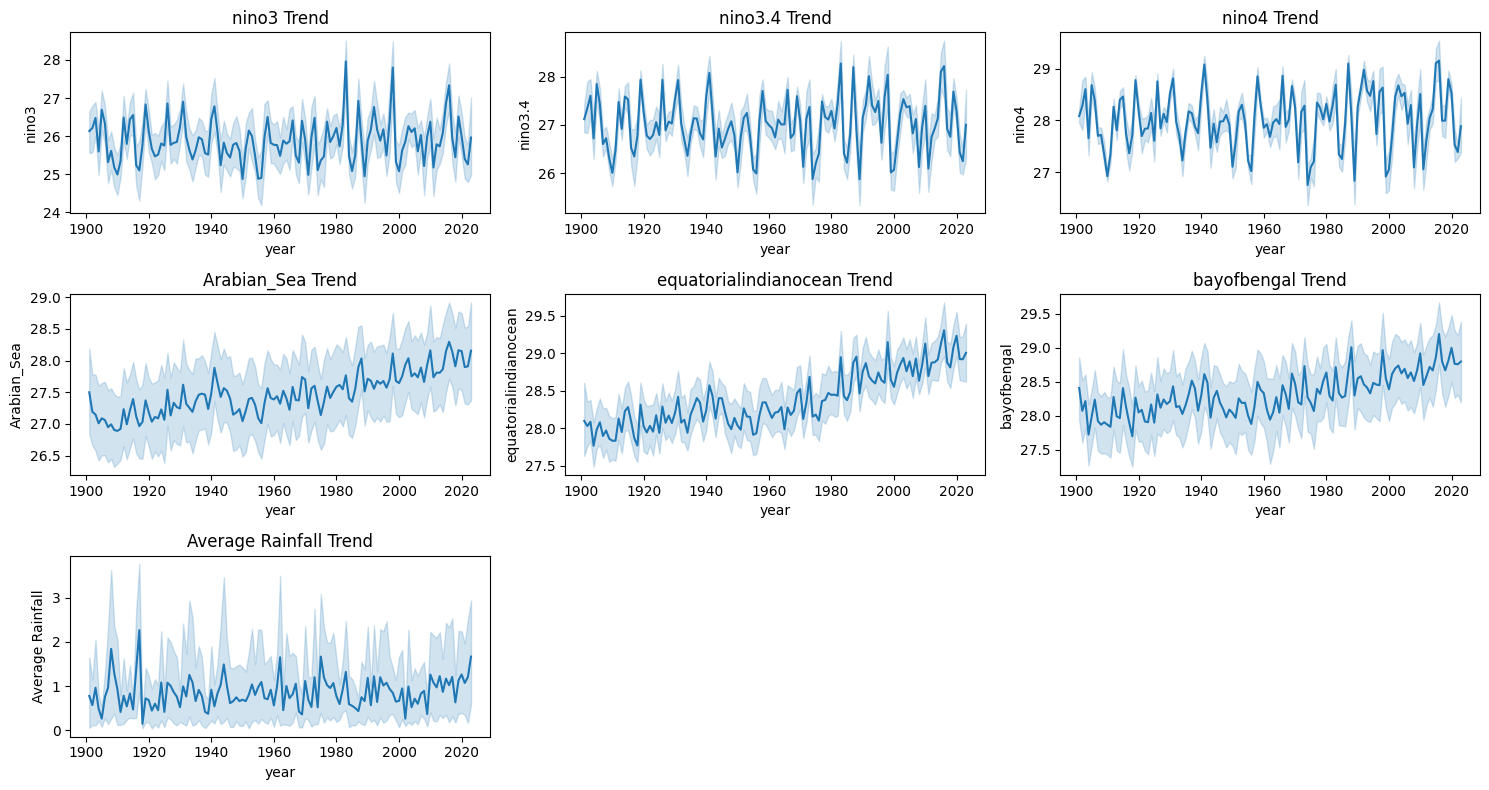

In [ ]:
def plot_ts_features(df):
    """Plot time series of key features"""
    plt.figure(figsize=(15,8))
    for i, feature in enumerate(features, 1):
        plt.subplot(3,3,i)
        sns.lineplot(data=df, x='year', y=feature)
        plt.title(f'{feature} Trend')
    plt.tight_layout()
    plt.show()

plot_ts_features(df)

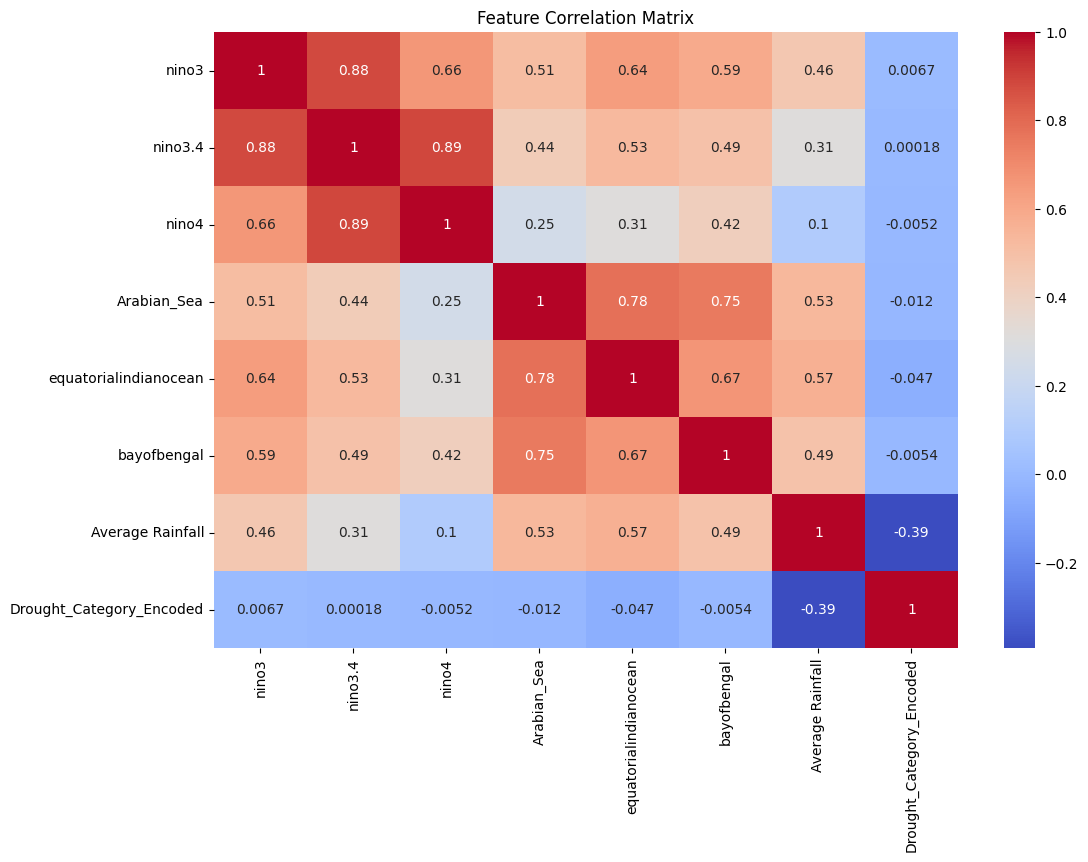

In [ ]:
def plot_correlation(df):
    """Plot feature correlation matrix"""
    plt.figure(figsize=(12,8))
    corr = df[features + ['Drought_Category_Encoded']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Matrix")
    plt.show()

plot_correlation(df)

In [ ]:
X_train

,nino3,nino3.4,nino4,Arabian_Sea,equatorialindianocean,bayofbengal,Average Rainfall
0,26.116969,27.032637,27.911399,26.879438,27.931744,27.232272,0.069348
1,26.431279,27.287510,27.964798,28.441569,28.534986,28.201504,0.152894
2,26.902539,27.620280,28.213469,29.247251,29.290119,29.288933,3.247804
3,27.144844,27.660678,28.473432,28.159310,28.960749,29.527194,2.542841
4,26.593484,27.424999,28.232846,26.890903,28.065052,28.754864,0.034815
...,...,...,...,...,...,...,...
1171,24.928765,26.003580,27.381727,28.328586,28.502671,29.150865,0.030000
1172,24.633273,25.634871,26.969888,28.019035,28.507293,29.056930,0.281772
1173,24.391656,25.510120,26.810651,27.131677,28.436712,28.688728,0.164760
1174,24.462938,25.145920,26.321128,26.357734,28.333211,27.715561,0.030000


In [ ]:
y_train

,future_drought
0,1.0
1,2.0
2,4.0
3,2.0
4,2.0
...,...
1171,1.0
1172,2.0
1173,2.0
1174,1.0


### Model Training

In [ ]:
# Train model
model.fit(X_train, y_train)

# Evaluate performance
y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         1.0       0.62      0.47      0.54       125
         2.0       0.65      0.83      0.73       156
         3.0       0.00      0.00      0.00        11
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1

    accuracy                           0.64       294
   macro avg       0.25      0.26      0.25       294
weighted avg       0.61      0.64      0.62       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

In [ ]:
# Predict drought for next 2 months using latest data
latest_sst_data = X.iloc[[-1]]  # Most recent lag-adjusted observations
predicted_category = model.predict(latest_sst_data)
probabilities = model.predict_proba(latest_sst_data)[0]

print(f"\nPredicted Drought Category (2 months ahead): {predicted_category[0]}")
print("Category Probabilities:", dict(zip(model.classes_, probabilities)))

# Feature Importance Analysis (using coefficients)
coefficients = model.named_steps['logisticregression'].coef_
print("\nFeature Importance:")
for feature, coef in zip(features, coefficients[0]):
    print(f"{feature}: {coef:.3f}")



Predicted Drought Category (2 months ahead): 2.0
Category Probabilities: {np.float64(1.0): np.float64(0.27928950315289525), np.float64(2.0): np.float64(0.7019709206878756), np.float64(3.0): np.float64(0.015034554835332338), np.float64(4.0): np.float64(0.003294691902569078), np.float64(5.0): np.float64(0.00041032942132778746)}

Feature Importance:
nino3: 0.086
nino3.4: -0.334
nino4: 0.284
Arabian_Sea: -0.062
equatorialindianocean: -0.367
bayofbengal: 0.601
Average Rainfall: 0.007


### Results

In [ ]:
print("Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Model Performance:
Accuracy: 0.64


<ipython-input-89-613af6a370e4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, ax=ax[0], palette='Blues')
<ipython-input-89-613af6a370e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, ax=ax[1], palette='Oranges')


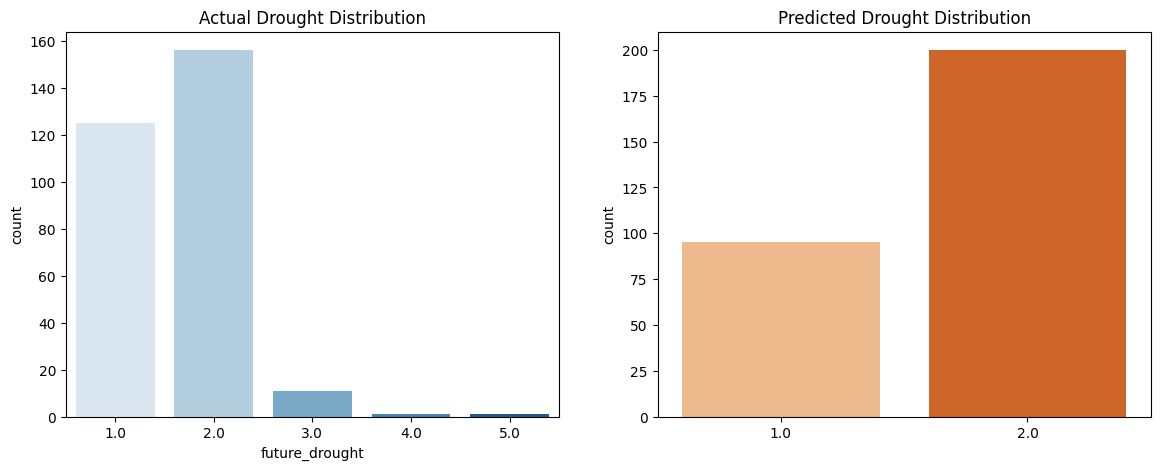

In [ ]:
def plot_class_distribution(y_true, y_pred):
    """Compare actual vs predicted distribution"""
    fig, ax = plt.subplots(1,2, figsize=(14,5))
    sns.countplot(x=y_true, ax=ax[0], palette='Blues')
    ax[0].set_title('Actual Drought Distribution')
    sns.countplot(x=y_pred, ax=ax[1], palette='Oranges')
    ax[1].set_title('Predicted Drought Distribution')
    plt.show()

plot_class_distribution(y_test, predictions)

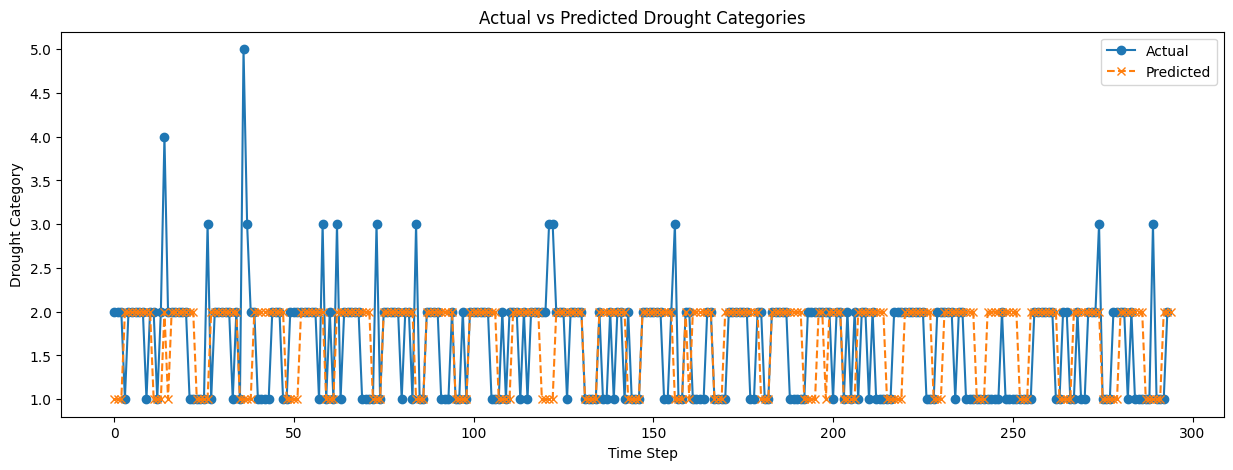

In [ ]:
def plot_actual_vs_predicted(y_test, predictions):
    """Time series comparison plot"""
    plt.figure(figsize=(15,5))
    plt.plot(y_test.values, label='Actual', marker='o')
    plt.plot(predictions, label='Predicted', linestyle='--', marker='x')
    plt.title('Actual vs Predicted Drought Categories')
    plt.xlabel('Time Step')
    plt.ylabel('Drought Category')
    plt.legend()
    plt.show()


plot_actual_vs_predicted(y_test, predictions)

<ipython-input-91-3752690568af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model.classes_, y=probabilities[0], palette='viridis')


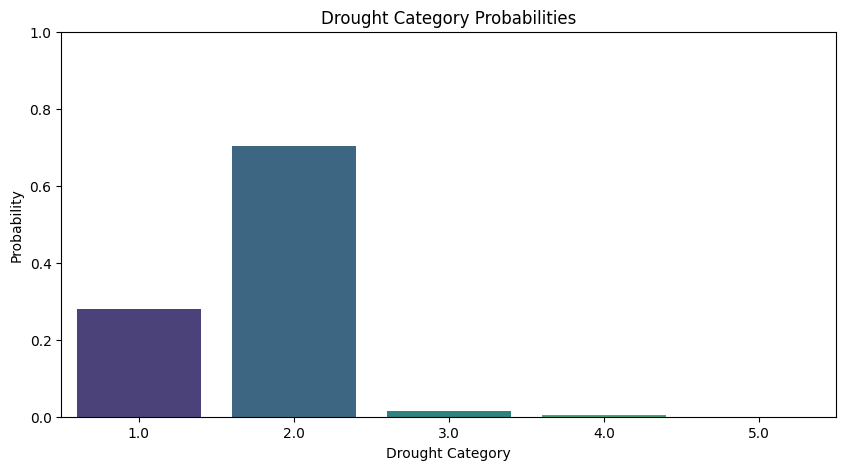

In [ ]:
def plot_prediction_probabilities(probabilities):
    """Visualize prediction probabilities"""
    plt.figure(figsize=(10,5))
    sns.barplot(x=model.classes_, y=probabilities[0], palette='viridis')
    plt.title('Drought Category Probabilities')
    plt.xlabel('Drought Category')
    plt.ylabel('Probability')
    plt.ylim(0,1)
    plt.show()

# For probability visualization of latest prediction
probabilities = model.predict_proba(latest_sst_data)
plot_prediction_probabilities(probabilities)

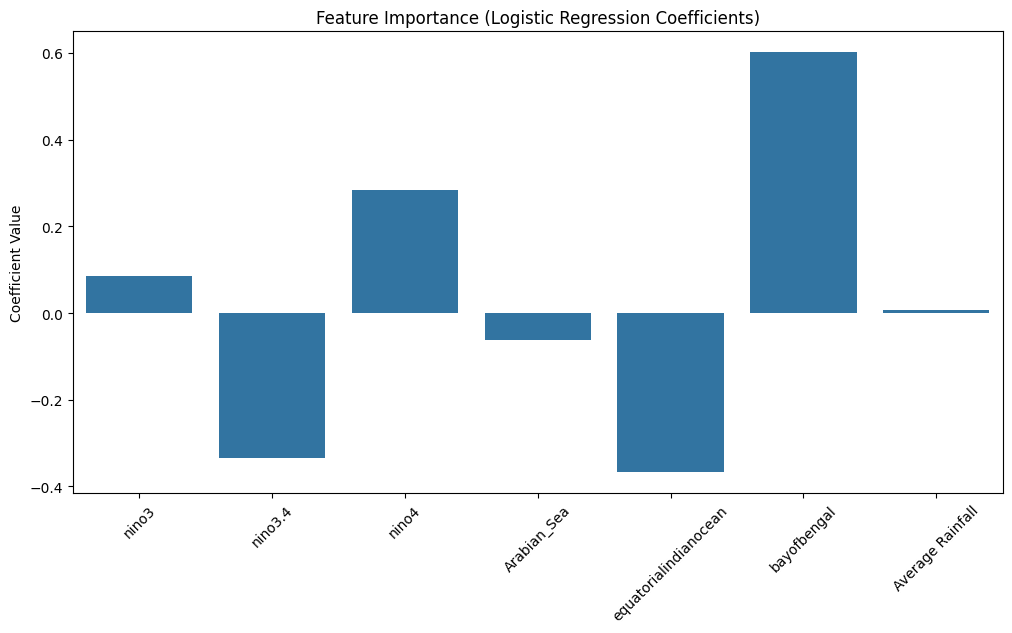

In [ ]:
def plot_feature_importance(model, features):
    """Plot logistic regression coefficients"""
    coeffs = model.named_steps['logisticregression'].coef_[0]
    plt.figure(figsize=(12,6))
    sns.barplot(x=features, y=coeffs)
    plt.title('Feature Importance (Logistic Regression Coefficients)')
    plt.xticks(rotation=45)
    plt.ylabel('Coefficient Value')
    plt.show()

plot_feature_importance(model, features)

In [ ]:
# New data template for prediction (replace values accordingly)
new_sst_data = pd.DataFrame([[
    26.5,   # nino3 (4-month lag)
    27.8,   # nino3.4 (3-month lag)
    28.2,   # nino4 (3-month lag)
    29.1,   # Arabian_Sea (2-month lag)
    28.7,   # equatorialindianocean (3-month lag)
    28.9,   # bayofbengal (3-month lag)
    150     # Current rainfall
]], columns=features)

prediction = model.predict(new_sst_data)
print(f"Predicted Drought Category: {prediction[0]}")

Predicted Drought Category: 4.0
